In [2]:
import pymc as pm
import arviz as az
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pymc as pm
from sklearn.model_selection import train_test_split

Pseudo-naive Bayes

In [3]:
df = pd.read_csv('../../data/processed/ProcessedTweets.csv')
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negative_reason,negative_reason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone,fractional_hour,hour_sin,hour_cos
0,570306133677760513,0,1.0000,0,0.0000,0,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52-08:00,Unknown,Eastern Time (US & Canada),11.597778,0.105107,-0.994461
1,570301130888122368,1,0.3486,0,0.0000,0,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59-08:00,Unknown,Pacific Time (US & Canada),11.266389,0.190880,-0.981613
2,570301083672813571,0,0.6837,0,0.0000,0,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48-08:00,Lets Play,Central Time (US & Canada),11.263333,0.191666,-0.981460
3,570301031407624196,2,1.0000,1,0.7033,0,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36-08:00,Unknown,Pacific Time (US & Canada),11.260000,0.192522,-0.981293
4,570300817074462722,2,1.0000,2,1.0000,0,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45-08:00,Unknown,Pacific Time (US & Canada),11.245833,0.196160,-0.980572


In [4]:
X_train, X_test, y_train, y_test = train_test_split(df[['airline_sentiment_confidence', 'airline', 'hour_sin', 'hour_cos']], df['airline_sentiment'], test_size=0.2, random_state=42)

In [5]:
with pm.Model() as model:
    class_prior = pm.Dirichlet('class_prior', a=np.ones(len(np.unique(y_train))))

    means = pm.Normal('means', mu=0, sigma=10, shape=(len(np.unique(y_train)), X_train.shape[1]))
    sigmas = pm.HalfNormal('sds', sigma=10, shape=(len(np.unique(y_train)), X_train.shape[1]))

    feature_likelihoods = pm.Normal('feature_likelihoods', 
                                    mu=means[y_train], 
                                    sigma=sigmas[y_train], 
                                    observed=X_train)

    nuts_sampler_kwargs = {'target_accept': 0.99, 'max_treedepth': 20}
    trace = pm.sample(2000, tune=1000, nuts_sampler_kwargs=nuts_sampler_kwargs, return_inferencedata=True)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [class_prior, means, sds]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 73 seconds.


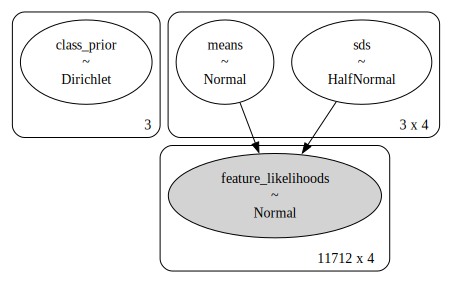

In [12]:
pm.model_to_graphviz(model)

In [6]:
az.summary(trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
"means[0, 0]",0.821,0.004,0.814,0.828,0.000,0.000,20931.0,5800.0,1.0
"means[0, 1]",2.600,0.029,2.545,2.653,0.000,0.000,20710.0,6052.0,1.0
"means[0, 2]",-0.036,0.014,-0.062,-0.009,0.000,0.000,20090.0,6002.0,1.0
"means[0, 3]",-0.383,0.012,-0.405,-0.360,0.000,0.000,17721.0,5296.0,1.0
"means[1, 0]",0.872,0.004,0.865,0.880,0.000,0.000,18212.0,5852.0,1.0
"means[1, 1]",2.528,0.033,2.463,2.587,0.000,0.000,16626.0,6262.0,1.0
"means[1, 2]",-0.060,0.017,-0.092,-0.029,0.000,0.000,17634.0,5470.0,1.0
"means[1, 3]",-0.356,0.013,-0.382,-0.332,0.000,0.000,18319.0,6008.0,1.0
"means[2, 0]",0.934,0.002,0.931,0.937,0.000,0.000,18125.0,6377.0,1.0
"means[2, 1]",2.929,0.019,2.893,2.962,0.000,0.000,18682.0,5809.0,1.0


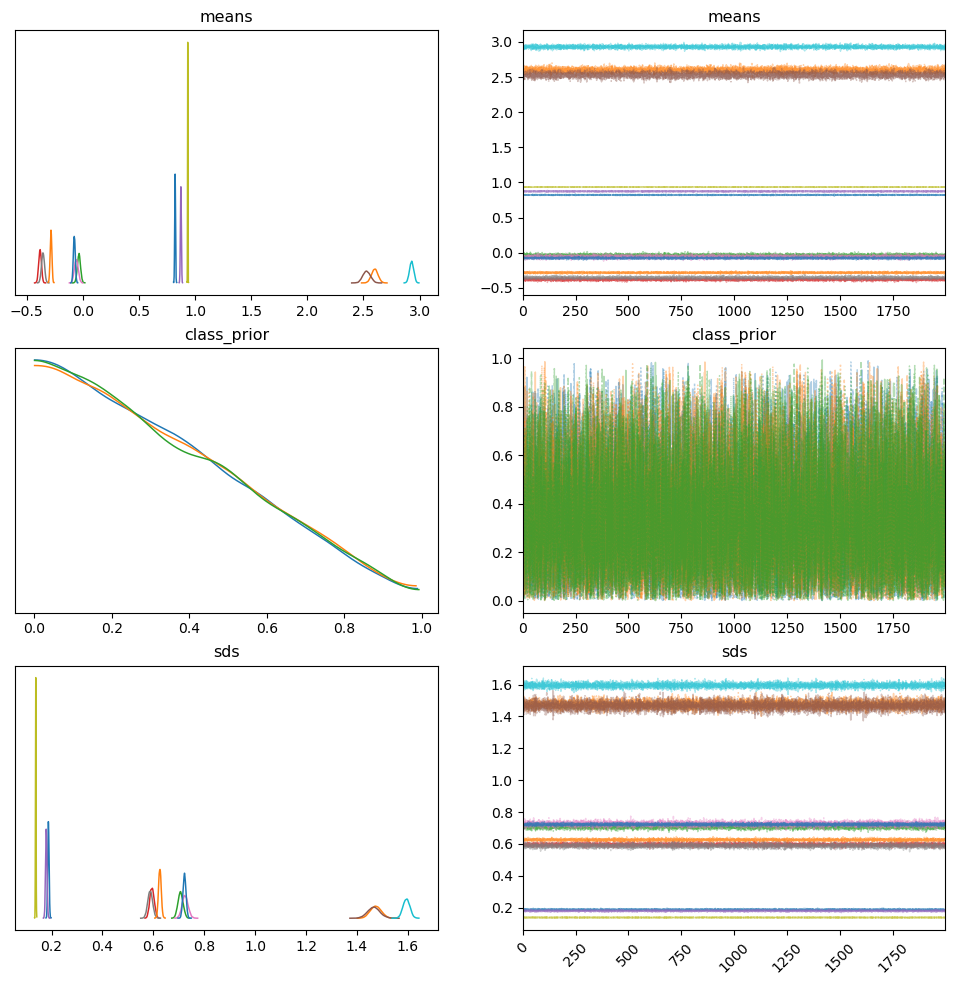

In [7]:
plt.rcParams['font.size'] = 10
az.plot_trace(trace, combined=True)
plt.xticks(rotation=45)
plt.subplots_adjust(top=2.5)
plt.subplots_adjust(bottom=1)

array([<Axes: title={'center': '94.0% HDI'}>,
       <Axes: title={'center': 'r_hat'}>], dtype=object)

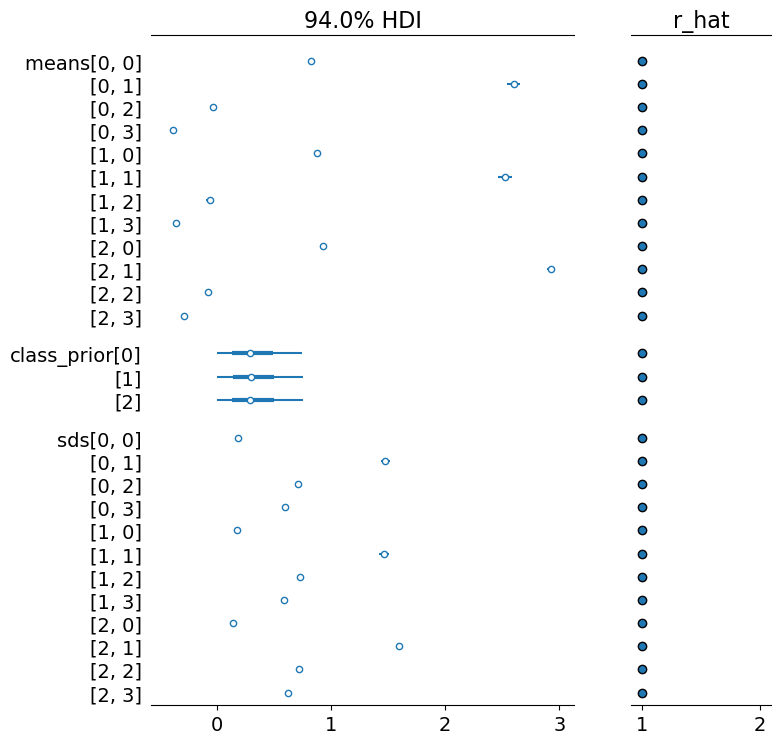

In [16]:
az.plot_forest(trace, combined=True, r_hat=True)

<Axes: >

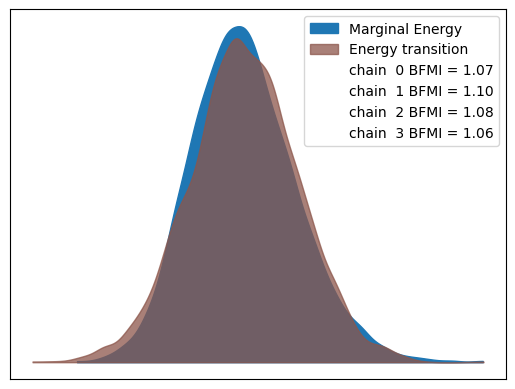

In [13]:
az.plot_energy(trace)